In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/gk/Desktop/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/gk/Desktop/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [18]:
cnn = tf.keras.models.Sequential()

In [19]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [21]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [25]:
cnn.add(tf.keras.layers.Flatten())

In [26]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [28]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [30]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [31]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1997s 908ms/step - accuracy: 0.3897 - loss: 2.1810 - val_accuracy: 0.8491 - val_loss: 0.4924
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2076s 945ms/step - accuracy: 0.8291 - loss: 0.5389 - val_accuracy: 0.9078 - val_loss: 0.2948
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2050s 933ms/step - accuracy: 0.9013 - loss: 0.3055 - val_accuracy: 0.9242 - val_loss: 0.2336
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2090s 951ms/step - accuracy: 0.9324 - loss: 0.2114 - val_accuracy: 0.9373 - val_loss: 0.1984
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1922s 875ms/step - accuracy: 0.9484 - loss: 0.1553 - val_accuracy: 0.9276 - val_loss: 0.2278
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1913s 871ms/step - accuracy: 0.9621 - loss: 0.1163 - val_accuracy: 0.9586 - val_loss: 0.1303
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1936s 881ms/step - accuracy: 0.9705 - loss: 0.0902 - val_accuracy: 0.9409 - val_loss: 0.1944
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1923s 875ms/s

In [33]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 587s 267ms/step - accuracy: 0.9912 - loss: 0.0282
Training accuracy: 0.9919340014457703


In [34]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 142s 258ms/step - accuracy: 0.9675 - loss: 0.1118
Validation accuracy: 0.9669929146766663


In [35]:
cnn.save('trained_plant_disease_model.keras')

In [36]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5934561491012573,
  0.8543282151222229,
  0.9123550653457642,
  0.9376342296600342,
  0.9528842568397522,
  0.9648481607437134,
  0.9709510207176208,
  0.975332498550415,
  0.9797709584236145,
  0.9812362194061279],
 'loss': [1.3891574144363403,
  0.45650815963745117,
  0.2718970477581024,
  0.19216425716876984,
  0.1419082134962082,
  0.1094609797000885,
  0.08935239166021347,
  0.07654689252376556,
  0.062394361943006516,
  0.05918281897902489],
 'val_accuracy': [0.8490780591964722,
  0.9077509641647339,
  0.9241976141929626,
  0.9373434782028198,
  0.9276121258735657,
  0.9586273431777954,
  0.9409287571907043,
  0.9566355347633362,
  0.9442294836044312,
  0.9669929146766663],
 'val_loss': [0.4923926293849945,
  0.29483330249786377,
  0.23355624079704285,
  0.19844260811805725,
  0.22784142196178436,
  0.13033775985240936,
  0.19440247118473053,
  0.13948750495910645,
  0.2084178328514099,
  0.10845392197370529]}

In [37]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [38]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [40]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [41]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/Users/gk/Desktop/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [42]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras')

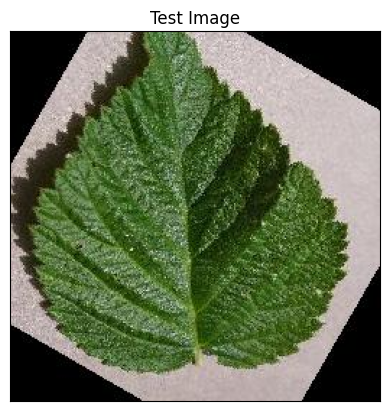

In [88]:
#Test Image Visualization
import cv2
image_path = '/Users/gk/Desktop/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Raspberry___healthy/0f9c8b1e-e13d-4db8-bd39-6f9ce73b244d___Mary_HL 6409_new30degFlipLR.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [89]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [90]:
print(predictions)

[[2.35348616e-11 4.13471689e-17 6.47348115e-14 1.87049502e-15
  1.81614411e-11 2.10125793e-15 3.99424421e-16 5.91654367e-17
  1.51146190e-20 6.91585331e-23 5.87300675e-18 7.55358836e-17
  1.95863147e-16 2.10105862e-14 8.68247529e-10 6.56976383e-16
  1.46472442e-20 2.08673383e-17 2.82413159e-17 1.19814497e-11
  5.20464440e-18 6.84000323e-15 5.85013957e-08 9.99971032e-01
  4.17954213e-12 9.85840133e-15 1.58730369e-13 2.89173367e-05
  4.68674976e-17 7.00831917e-18 2.94659519e-18 1.13882525e-18
  1.77002979e-16 5.45317800e-16 1.08756845e-14 8.46477904e-14
  2.50593325e-14 1.96816155e-13]]


In [91]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

23


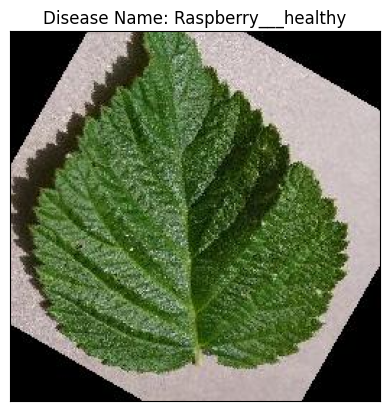

In [92]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()